In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


Czyszczenie i porządkowanie danych:

In [4]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [5]:
df.dropna(thresh=2,inplace=True)

In [6]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


### Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

<AxesSubplot:xlabel='count', ylabel='ManagerName'>

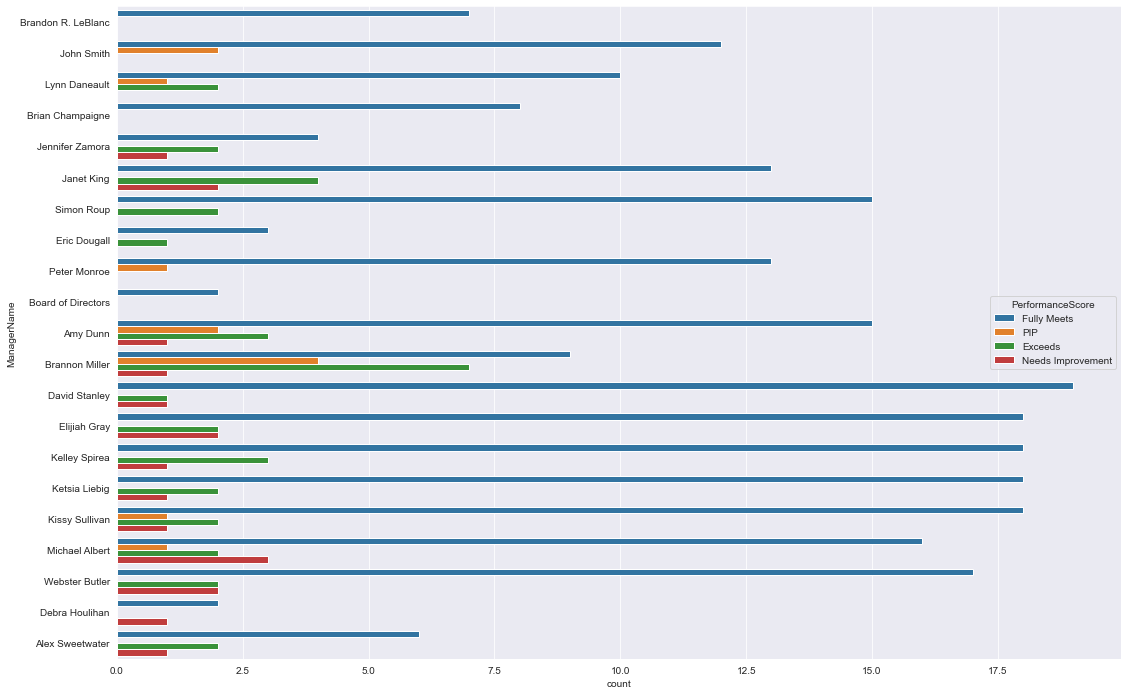

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,12))
sns.countplot(y='ManagerName', hue='PerformanceScore', data=df)

Dane nie wskazują większej zależności miedzy przełożonym, a wydajnością podległym im pracownikom.

### Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [8]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [9]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

<Figure size 1440x1440 with 0 Axes>

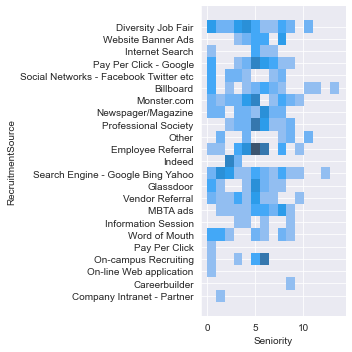

In [10]:
plt.figure(figsize=(20,20))
sns.displot(x='Seniority', y='RecruitmentSource', data=df)

Najlepszym źródłem poszukiwania pracowników, którzy zasilą przedsiębiorstwo na długie lata to: Targi pracy - są zatrudniani na okrągło i pozostają w strukturze nawet do 10-11 lat; Bilbordy - występują tu kilkuletnie przerwy w zatrudniamu pracowników z tego źródła, ale osoby zatrudnione osiągają wysoki staż pracy, nawet do 13-14 lat, Referencje pracowników - z tego źródła znajduje się największa grupa pracowników posiadających 5-6-letni staż pracy, Wyszukiwarka internetowa - tożsama z Targami pracy.

### Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

<AxesSubplot:xlabel='MaritalDesc', ylabel='count'>

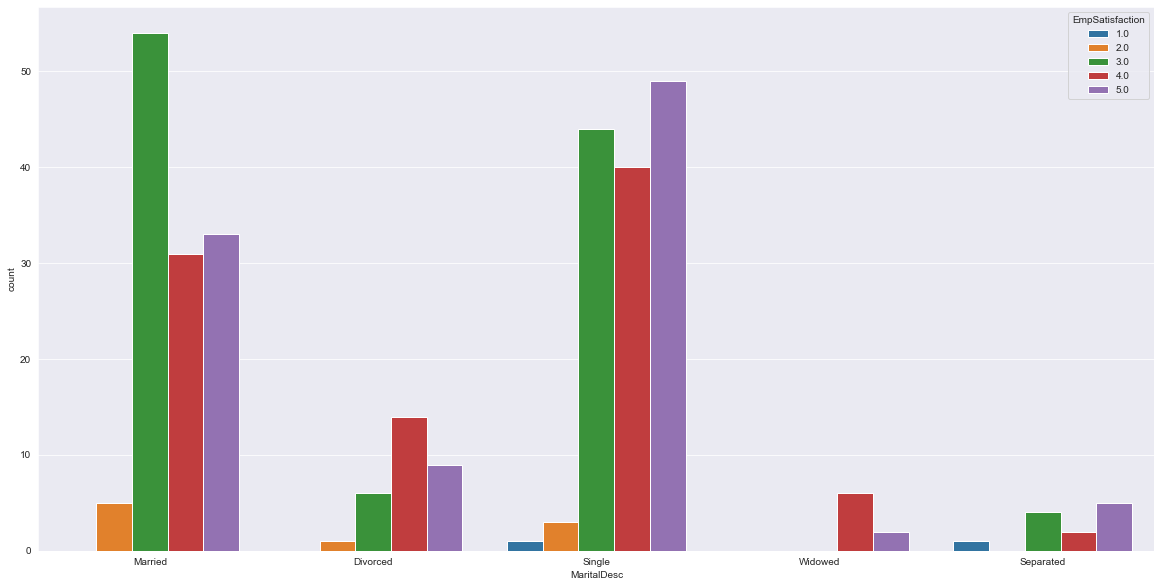

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='MaritalDesc', hue='EmpSatisfaction', data=df)

Dane wskazują, że najbardziej zadowoloną grupą są osoby samotne (jednocześnie najlicznejsza grupa). W grupie osób po ślubie wyraźnie widzimy zróżnicowanie w zadowoleniu, mimo wszystko kształtuje się ono pozytywnie. Grupa rozwodników jest nieliczna, ale w większości pozytywnie lub bardzo pozytywnie nastawiona do pracy. Grupy wdowców i w separacji są na tyle nieliczne, że nie pozwalają wyciągnąć wystarczających wniosków.

### Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [12]:
df2=df[df['TermReason'] == 'N/A - still employed'] # osoby wciąż zatrudnione z różnym statusem aktywności
df2[['DateofTermination','DOB','DateofHire']]

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
4,NaT,1988-05-19,2015-05-01
7,NaT,2063-05-15,2014-08-18
...,...,...,...
300,NaT,1987-04-04,2015-02-16
305,NaT,2052-01-18,2014-11-10
306,NaT,1986-04-23,2014-11-10
308,NaT,2065-09-09,2014-11-10


In [13]:
def emploee_age(row):
    today = dt.datetime(2019,9,27)
    return (today - row['DOB'])/np.timedelta64(1,'Y')

df2['Age'] = df2.apply(lambda row: emploee_age(row),axis=1)
df2

C:\Users\Marcin\AppData\Local\Temp\ipykernel_14820\277707724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = df2.apply(lambda row: emploee_age(row),axis=1)


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.916035,31.841858
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.722226,35.420303
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.993942,33.071179
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.408030,31.357249
7,"Carter, Michelle",1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,...,Sales,John Smith,17.0,Billboard,Fully Meets,5.00,5.0,0.0,5.108934,-43.631286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"Boutwell, Bonalyn",1.307060e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,34.95,...,Admin Offices,Brandon R. LeBlanc,3.0,Diversity Job Fair,Fully Meets,5.00,4.0,3.0,4.610635,32.482529
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,4.878950,-32.310041
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,4.878950,33.429845
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,4.878950,-45.953031


<Figure size 1080x360 with 0 Axes>

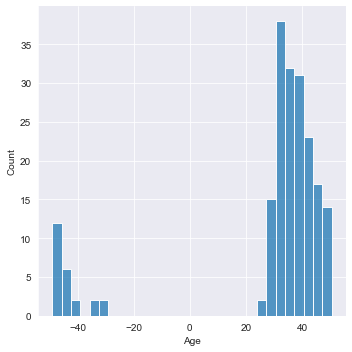

In [23]:
plt.figure(figsize=(15,5))
sns.displot(df2['Age']) #nie wiem czemu datę 05/15/63 zamienia na 2063-05-15, co powoduje, że są wartości ujemne

### Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

<Figure size 1440x1440 with 0 Axes>

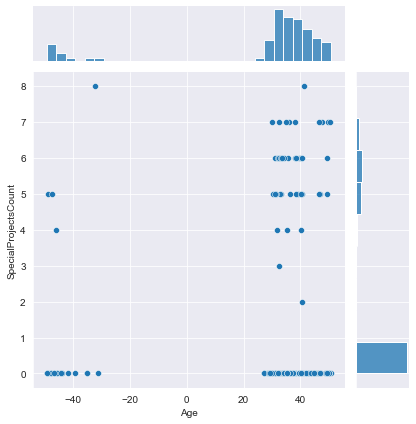

In [30]:
# plt.figure(figsize=(20,10))
# sns.barplot(x='Age', y='SpecialProjectsCount', data=df2)

plt.figure(figsize=(20,20))
sns.jointplot(x='Age',y='SpecialProjectsCount',data=df2)

# plt.figure(figsize=(15,5))
# sns.barplot(x='Age',y='SpecialProjectsCount',data=df2)